<a href="https://colab.research.google.com/github/annshita/IoT-Anomaly-Detection/blob/main/IoT_Anomaly_Detection_Edge_IIoT(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using "Attack Label" as target class thus binary classification.**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
filepath = "ML-EdgeIIoT-dataset.csv"

In [ ]:
df = pd.read_csv(filepath)

<ipython-input-3-7248a6640290>:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:
X = df[[ 'arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id']]
Y = df['Attack_label']

**DECISION TREE**

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

DT.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score:')
score = DT.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
[1 0 1 ... 1 0 1]

Score:
0.9937262357414449
program end...

time cost: 
0.6464316844940186 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred,zero_division=0))

Classifiction Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4830
           1       1.00      1.00      1.00     26730

    accuracy                           0.99     31560
   macro avg       0.99      0.99      0.99     31560
weighted avg       0.99      0.99      0.99     31560



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9957769638986471
Recall: 0.9968200523756079
F1 Score: 0.9962982351181573


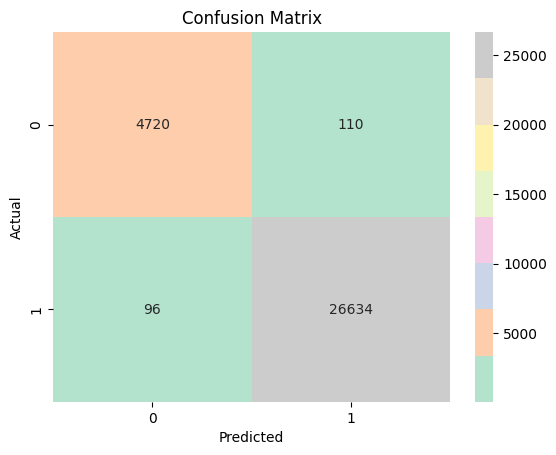

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel2")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**NAIVE BAYES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.88027223, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14580663, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.53628762, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


0.894169835234474

[1 1 1 ... 1 1 1]

program end...

time cost: 
0.22617864608764648 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred, zero_division=0))

Classifiction Report :
              precision    recall  f1-score   support

           0       0.98      0.32      0.48      4842
           1       0.89      1.00      0.94     26718

    accuracy                           0.89     31560
   macro avg       0.93      0.66      0.71     31560
weighted avg       0.90      0.89      0.87     31560



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8898672536855446
Recall: 0.9985777378546299
F1 Score: 0.9410934744268078


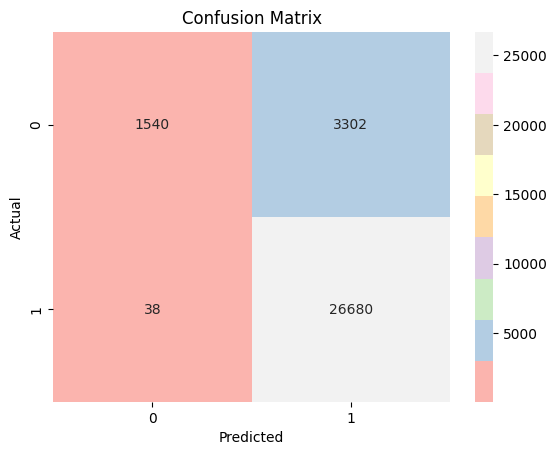

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.49      4921
           1       0.89      1.00      0.94     26639

    accuracy                           0.89     31560
   macro avg       0.94      0.66      0.72     31560
weighted avg       0.91      0.89      0.87     31560



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8891522029372496
Recall: 1.0
F1 Score: 0.9413240516616901


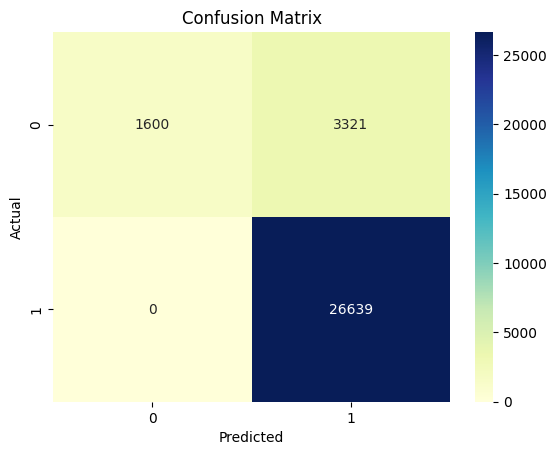

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SUPPORT VECTOR MACHINE**

In [ ]:
SVM_classifier = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True).fit(X_train, Y_train)
print()
print(SVM_classifier.score(X_test, Y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

[LibSVM]
0.9131812420785805

[1 0 1 ... 1 1 1]

program end...

time cost: 
667.3748826980591 seconds


In [ ]:
print("Classification Report:\n", classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.46      0.62      4830
           1       0.91      1.00      0.95     26730

    accuracy                           0.91     31560
   macro avg       0.93      0.73      0.78     31560
weighted avg       0.92      0.91      0.90     31560



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9107032801479148
Recall: 0.9950617283950617
F1 Score: 0.9510154462242563


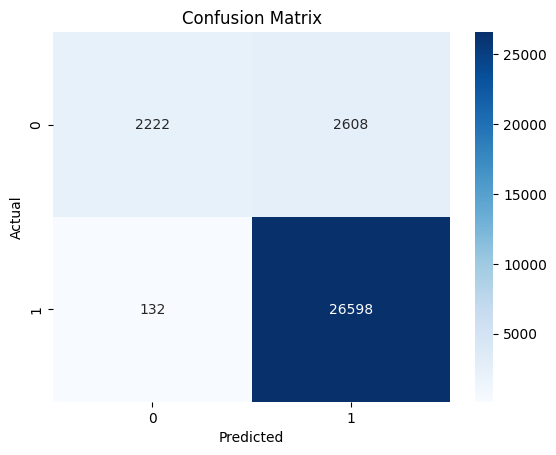

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

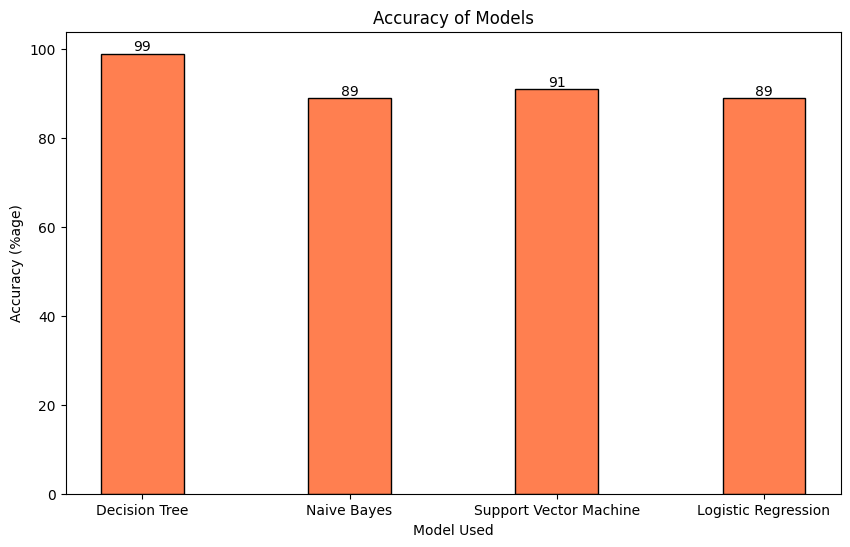

In [ ]:
import matplotlib.pyplot as plt
categories = ['Decision Tree', 'Naive Bayes', 'Support Vector Machine', 'Logistic Regression']
values = [99, 89, 91, 89]
plt.figure(figsize=(10, 6))
bars=plt.bar(categories, values, color='coral', edgecolor='black', width=0.4)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Model Used')
plt.ylabel('Accuracy (%age)')
plt.title('Accuracy of Models')
plt.show()